In [2]:
import sys
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys/')
from utils.aux_funcs import flatten_series
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils.population import Population

In [3]:
from matplotlib import cm

In [4]:
%matplotlib inline

In [5]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl
mpl.rcParams.update({'font.size': 18})
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [6]:
savepath = '/home/niell_lab/data/freely_moving_ephys/batch_files/101921/'
pop = Population(savepath)
pop.load_from_pickle(stage='population')

reading data from /home/niell_lab/data/freely_moving_ephys/batch_files/101921/pooled_ephys_population_update_102021.pickle


In [7]:
pop.data['session'].unique()

array(['012521_EE8P6LT_control_Rig2', '012821_EE8P6LT_control_Rig2',
       '021621_EE11P1LT_control_Rig2', '030921_EE11P13LTRN_control_Rig2',
       '062221_G6H31P2RT_control_Rig2', '062921_G6HCK1ALTRN_control_Rig2',
       '070621_J553LT_control_Rig2', '070921_J553RT_control_Rig2',
       '081821_J561RT_control_Rig2', '090821_HGeM1LT_control_Rig2',
       '090921_HGeM1LT_control_Rig2', '100921_J559RT_control_Rig2',
       '101621_J559NC_control_Rig2'], dtype=object)

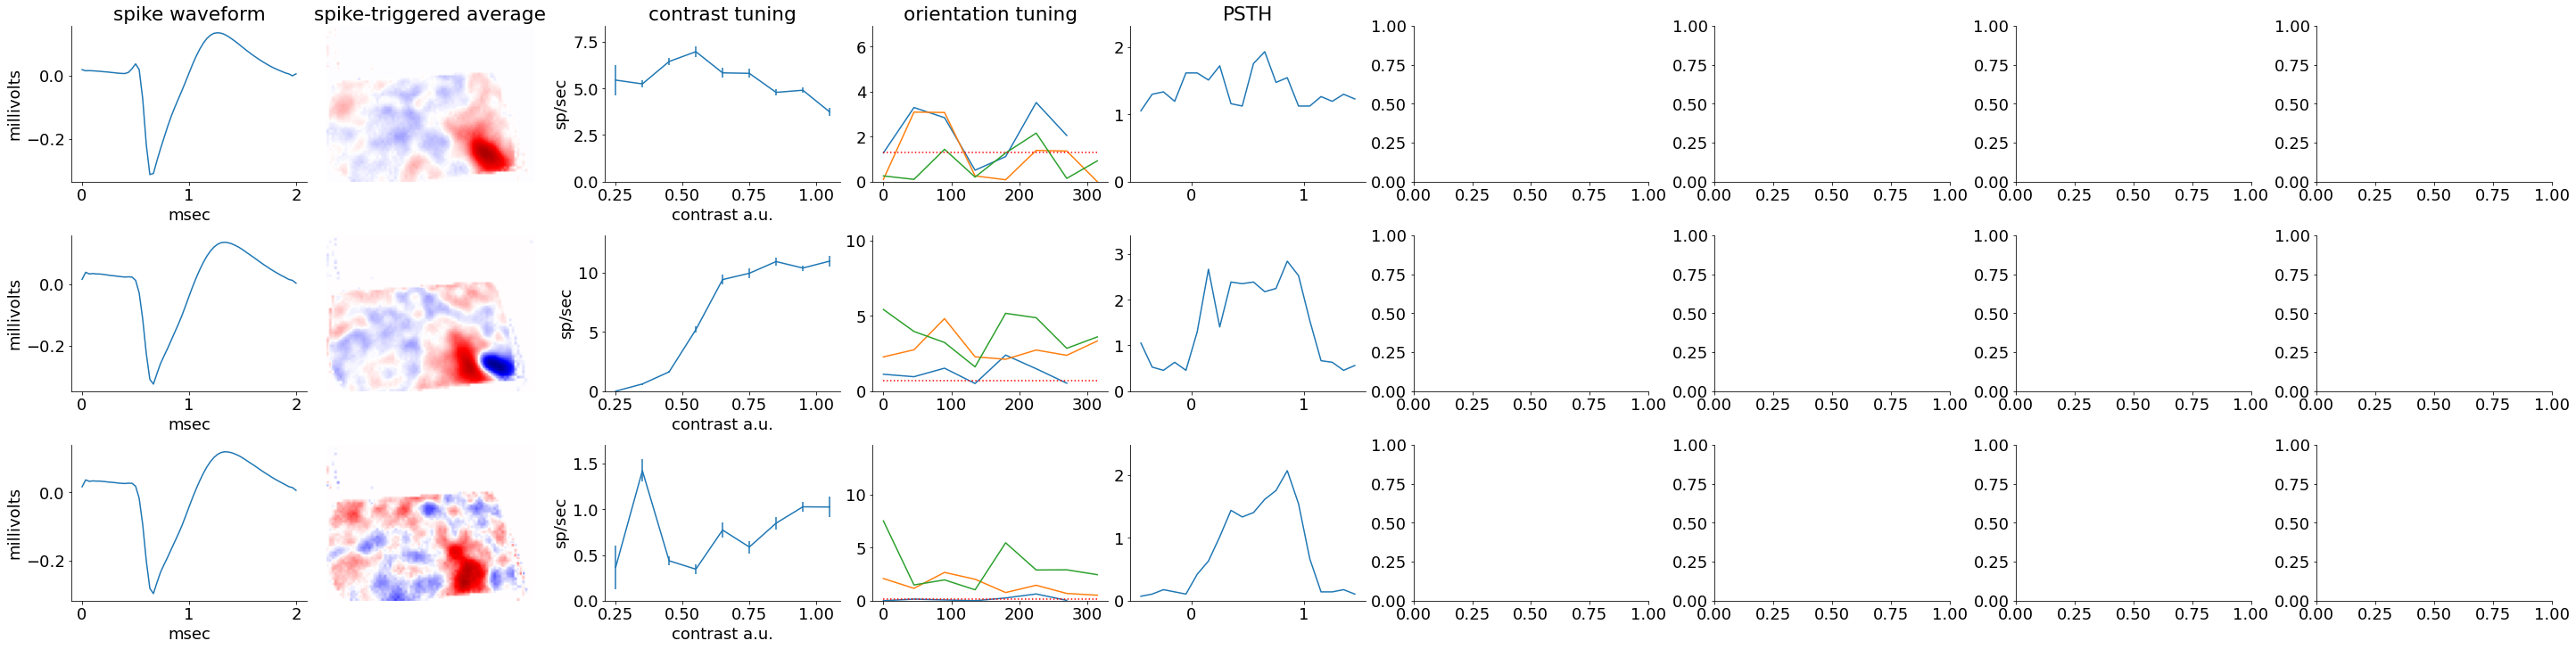

In [25]:
# fig 2: example neurons

example_inds = [0,1,2]

fig2 = plt.figure(constrained_layout=True, figsize=(40,10))
spec2 = gridspec.GridSpec(ncols=9, nrows=3, figure=fig2)

exc_wvfm = fig2.add_subplot(spec2[0,0])
exc_sta = fig2.add_subplot(spec2[0,1])
exc_crf = fig2.add_subplot(spec2[0,2])
exc_ori = fig2.add_subplot(spec2[0,3])
exc_psth = fig2.add_subplot(spec2[0,4])
exc_eye_gaze = fig2.add_subplot(spec2[0,5])
exc_eye_comp = fig2.add_subplot(spec2[0,6])
exc_head_gaze = fig2.add_subplot(spec2[0,7])
exc_head_comp = fig2.add_subplot(spec2[0,8])

inh_wvfm = fig2.add_subplot(spec2[1,0])
inh_sta = fig2.add_subplot(spec2[1,1])
inh_crf = fig2.add_subplot(spec2[1,2])
inh_ori = fig2.add_subplot(spec2[1,3])
inh_psth = fig2.add_subplot(spec2[1,4])
inh_eye_gaze = fig2.add_subplot(spec2[1,5])
inh_eye_comp = fig2.add_subplot(spec2[1,6])
inh_head_gaze = fig2.add_subplot(spec2[1,7])
inh_head_comp = fig2.add_subplot(spec2[1,8])

sbc_wvfm = fig2.add_subplot(spec2[2,0])
sbc_sta = fig2.add_subplot(spec2[2,1])
sbc_crf = fig2.add_subplot(spec2[2,2])
sbc_ori = fig2.add_subplot(spec2[2,3])
sbc_psth = fig2.add_subplot(spec2[2,4])
sbc_eye_gaze = fig2.add_subplot(spec2[2,5])
sbc_eye_comp = fig2.add_subplot(spec2[2,6])
sbc_head_gaze = fig2.add_subplot(spec2[2,7])
sbc_head_comp = fig2.add_subplot(spec2[2,8])

# waveform
for panel_num, panel in enumerate([exc_wvfm, inh_wvfm, sbc_wvfm]):
    ind = example_inds[panel_num]
    wv = pop.data['waveform'].iloc[ind]
    panel.plot(np.arange(len(wv))*1000/30000, wv)
    panel.set_ylabel('millivolts'); panel.set_xlabel('msec')
    if panel_num==0:
        panel.set_title('spike waveform')

# sta
for panel_num, panel in enumerate([exc_sta, inh_sta, sbc_sta]):
    ind = example_inds[panel_num]
    sta = np.reshape(pop.data['hf1_wn_spike_triggered_average'].iloc[ind],tuple(pop.data['hf1_wn_sta_shape'].iloc[ind]))
    sta_range = np.max(np.abs(sta))*1.2
    sta_range = (0.25 if sta_range<0.25 else sta_range)
    panel.imshow(sta, vmin=-sta_range, vmax=sta_range, cmap='seismic')
    panel.axis('off')
    if panel_num==0:
        panel.set_title('spike-triggered average')
        
for panel_num, panel in enumerate([exc_crf, inh_crf, sbc_crf]):
    ind = example_inds[panel_num]
    var_cent = pop.data['hf1_wn_crf_cent'].iloc[ind]
    tuning = pop.data['hf1_wn_crf_tuning'].iloc[ind]
    tuning_err = pop.data['hf1_wn_crf_err'].iloc[ind]
    panel.errorbar(var_cent, tuning, yerr=tuning_err)
    panel.set_xlabel('contrast a.u.'); panel.set_ylabel('sp/sec')
    panel.set_ylim(0, np.nanmax(tuning*1.2))
    if panel_num==0:
        panel.set_title('contrast tuning')
        
for panel_num, panel in enumerate([exc_ori, inh_ori, sbc_ori]):
    ind = example_inds[panel_num]
    raw_tuning = np.mean(pop.data['hf3_gratings_ori_tuning'].iloc[ind],2)
    drift_spont = pop.data['hf3_gratings_drift_spont'].iloc[ind]
    tuning = raw_tuning - drift_spont # subtract off spont rate
    tuning[tuning < 0] = 0 # set to 0 when tuning goes negative (i.e. when firing rate is below spontanious rate)
    panel.set_ylim([0,np.nanmax(pop.data['hf3_gratings_ori_tuning'].iloc[ind][:,:,:])*1.2])
    maxval = np.nanmax(raw_tuning)
    panel.plot(np.arange(8)*45, raw_tuning[:,0])
    panel.plot(np.arange(8)*45, raw_tuning[:,1])
    panel.plot(np.arange(8)*45, raw_tuning[:,2])
    panel.plot([0, 315],[drift_spont, drift_spont], 'r:', label='spont')
#     panel.annotate('0.02 cpd', xy=[2,maxval], color='tab:blue', fontsize=20)
#     panel.annotate('0.08 cpd', xy=[2,maxval-0.35], color='tab:orange', fontsize=20)
#     panel.annotate('0.32 cpd', xy=[2,maxval-0.7], color='tab:green', fontsize=20)
#     panel.annotate('spont. rate', xy=[2,maxval-1], color='tab:red', fontsize=20)
    if panel_num==0:
        panel.set_title('orientation tuning')
        
for panel_num, panel in enumerate([exc_psth, inh_psth, sbc_psth]):
    ind = example_inds[panel_num]
    lower = -0.5; upper = 1.5; dt = 0.1
    bins = np.arange(lower,upper+dt,dt)
    psth = pop.data['hf3_gratings_grating_psth'].iloc[ind]
    panel.plot(bins[0:-1]+dt/2, psth)
    panel.set_ylim([0,np.nanmax(psth)*1.2])
    if panel_num==0:
        panel.set_title('PSTH')
    
for panel_num, panel in enumerate([exc_eye_gaze, inh_eye_gaze, sbc_eye_gaze]):
    ind = example_inds[panel_num]
    
    rightavg = self.current_row[rightsacc]; leftavg = self.current_row[leftsacc]
    panel.set_title(title, fontsize=20)
    modind_right = self.saccade_modulation_index(rightavg)
    modind_left = self.saccade_modulation_index(leftavg)
    panel.plot(self.trange_x, rightavg[:], color='tab:blue')
    panel.annotate('0ms='+str(modind_right[0])+' 100ms='+str(modind_right[1]), color='tab:blue', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=15)
    panel.plot(self.trange_x, leftavg[:], color='tab:red')
    panel.annotate('0ms='+str(modind_left[0])+' 100ms='+str(modind_left[1]), color='tab:red', xy=(0.05, 0.87), xycoords='axes fraction', fontsize=15)
    panel.legend(['right','left'], loc=1)
    maxval = np.max(np.maximum(rightavg[:], leftavg[:]))*1.2
    panel.set_ylim([0, maxval])
    panel.set_xlim([-0.5, 0.6])
    
    if panel_num==0:
        panel.set_title('gaze-shifting')

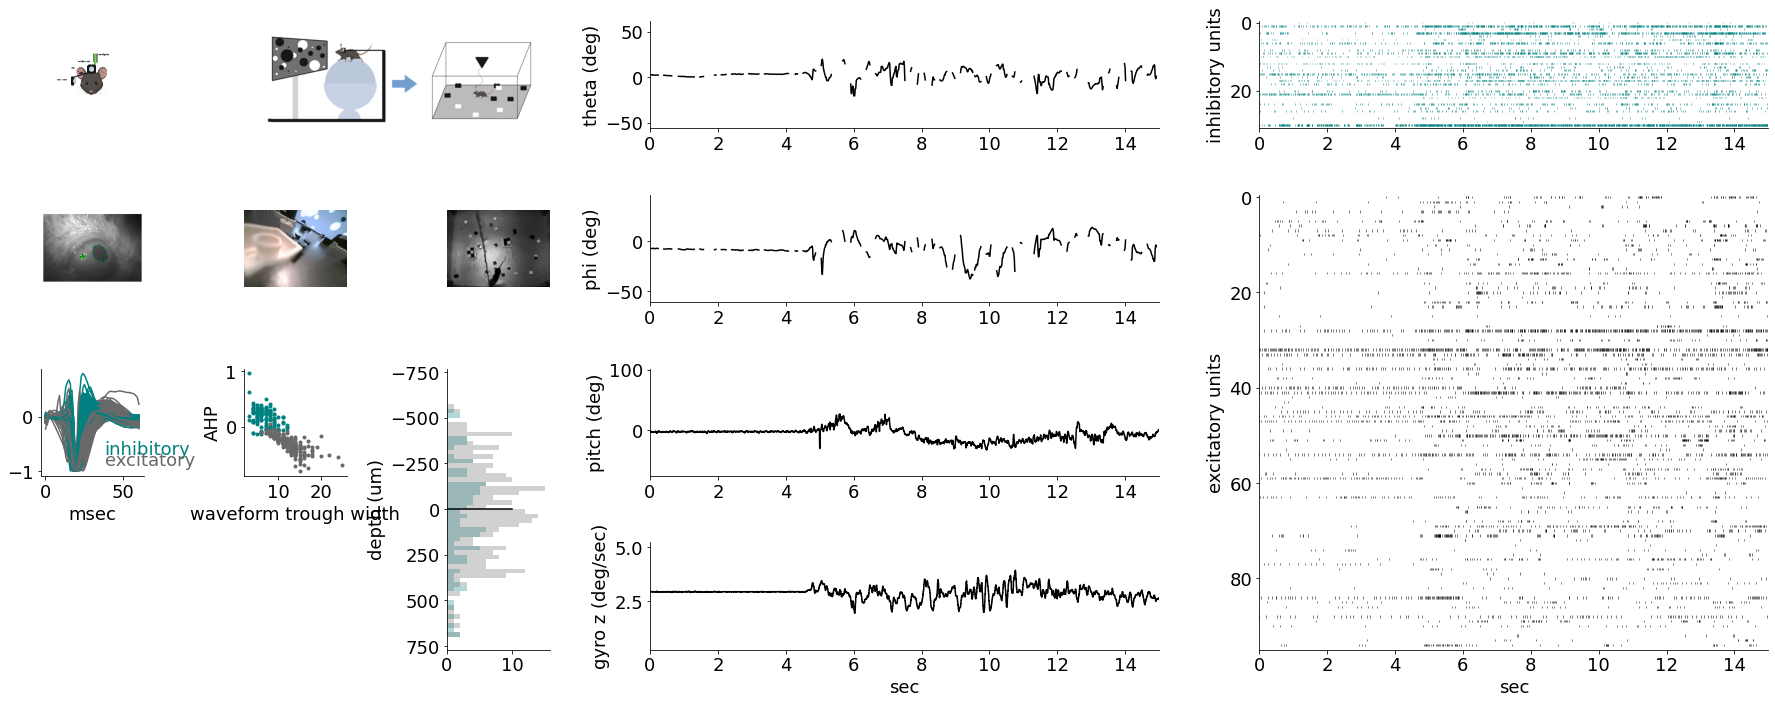

In [6]:
# fig 1: experimental setup, example rasters, etc.

demo_data = pop.data[pop.data['session']=='070921_J553RT_control_Rig2']
start = 1496 # sec from start of recording

fig1 = plt.figure(constrained_layout=True, figsize=(25,10))
spec1 = gridspec.GridSpec(ncols=10, nrows=4, figure=fig1)

ax_mouse_head = fig1.add_subplot(spec1[0,0:2])
ax_setup = fig1.add_subplot(spec1[0,2:6])
ax_eye_frame = fig1.add_subplot(spec1[1,0:2])
ax_world_frame = fig1.add_subplot(spec1[1,2:4])
ax_top_frame = fig1.add_subplot(spec1[1,4:6])
ax_celltype = fig1.add_subplot(spec1[2,0:2])
ax_ahp_vs_width = fig1.add_subplot(spec1[2,0:2])
ax_depth = fig1.add_subplot(spec1[2:,4:6])
ax_theta = fig1.add_subplot(spec1[0,6:8])
ax_phi = fig1.add_subplot(spec1[1,6:8])
ax_pitch = fig1.add_subplot(spec1[2,6:8])
ax_gyro_z = fig1.add_subplot(spec1[3,6:8])
ax_inh_raster = fig1.add_subplot(spec1[0,8:10])
ax_exc_raster = fig1.add_subplot(spec1[1:,8:10])

mouse_head = plt.imread('/home/niell_lab/Documents/figures/paper_imgs/gear_text.png')
ax_mouse_head.imshow(mouse_head)
ax_mouse_head.axis('off')

setup = plt.imread('/home/niell_lab/Documents/figures/paper_imgs/hf_to_fm.png')
ax_setup.imshow(setup)
ax_setup.axis('off')

eye_frame = plt.imread('/home/niell_lab/Documents/figures/paper_imgs/eye_ellipse.png')
ax_eye_frame.imshow(eye_frame)
ax_eye_frame.axis('off')

world_frame = plt.imread('/home/niell_lab/Documents/figures/paper_imgs/world_frame.png')
ax_world_frame.imshow(world_frame)
ax_world_frame.axis('off')

topdown_frame = plt.imread('/home/niell_lab/Documents/figures/paper_imgs/topdown_frame.png')
ax_top_frame.imshow(topdown_frame)
ax_top_frame.axis('off')

for ind, row in pop.data.iterrows():
    if row['exc_or_inh'] == 'inh' and np.max(row['norm_waveform'])<1:
        ax_celltype.plot(row['norm_waveform'], 'teal')
    elif row['exc_or_inh'] == 'exc' and np.max(row['norm_waveform'])<1:
        ax_celltype.plot(row['norm_waveform'], 'dimgray')
ax_celltype.set_xlabel('msec')
ax_celltype.annotate('inhibitory', xy=[38,-0.7], color='teal')
ax_celltype.annotate('excitatory', xy=[38,-0.9], color='dimgray')

ax_ahp_vs_width.plot(pop.data['waveform_trough_width'][pop.data['waveform_peak'] < 0][pop.data['exc_or_inh']=='inh'],
                     pop.data['AHP'][pop.data['waveform_peak'] < 0][pop.data['exc_or_inh']=='inh'], '.', color='teal')
ax_ahp_vs_width.plot(pop.data['waveform_trough_width'][pop.data['waveform_peak'] < 0][pop.data['exc_or_inh']=='exc'],
                     pop.data['AHP'][pop.data['waveform_peak'] < 0][pop.data['exc_or_inh']=='exc'], '.', color='dimgray')
ax_ahp_vs_width.set_ylabel('AHP')
ax_ahp_vs_width.set_xlabel('trough')

ax_depth.hist(pop.data['hf1_wn_depth_from_layer5'][pop.data['exc_or_inh']=='inh'], color='teal', bins=np.arange(-700,725,25), alpha=0.3, orientation='horizontal')
ax_depth.hist(pop.data['hf1_wn_depth_from_layer5'][pop.data['exc_or_inh']=='exc'], color='dimgray', bins=np.arange(-700,725,25), alpha=0.3, orientation='horizontal')
ax_depth.set_ylabel('depth (um)')
ax_depth.invert_yaxis()
ax_depth.plot([0,10],[0,0],'k')

ax_theta.plot(demo_data['fm1_eyeT'].iloc[0], demo_data['fm1_theta'].iloc[0], 'k')
ax_theta.set_xlim([start, start+15])
ax_theta.set_ylabel('theta (deg)')
ax_theta.set_xticklabels(np.arange(0,15,2))

ax_phi.plot(demo_data['fm1_eyeT'].iloc[0], demo_data['fm1_phi'].iloc[0], 'k')
ax_phi.set_xlim([start, start+15])
ax_phi.set_ylabel('phi (deg)')
ax_phi.set_xticklabels(np.arange(0,15,2))

ax_pitch.plot(demo_data['fm1_accT'].iloc[0], demo_data['fm1_pitch'].iloc[0], 'k')
ax_pitch.set_xlim([start, start+15])
ax_pitch.set_ylabel('pitch (deg)')
ax_pitch.set_xticklabels(np.arange(0,15,2))

ax_gyro_z.plot(demo_data['fm1_accT'].iloc[0], demo_data['fm1_gz'].iloc[0], 'k')
ax_gyro_z.set_xlim([start, start+15])
ax_gyro_z.set_ylabel('gyro z (deg/sec)')
ax_gyro_z.set_xticklabels(np.arange(0,15,2))
ax_gyro_z.set_xlabel('sec')

sh_num = 4
inh_goodcells = demo_data[demo_data['exc_or_inh']=='inh']
sh0 = np.arange(0,len(inh_goodcells.index)+sh_num,sh_num)
full_raster = np.array([]).astype(int)
for sh in range(sh_num):
    full_raster = np.concatenate([full_raster, sh0+sh])
for i, ind in enumerate(inh_goodcells.index):
    i = full_raster[i]
    ax_inh_raster.vlines(inh_goodcells.at[ind,'fm1_spikeT'],i-0.25,i+0.25,color='teal',linewidth=0.5)
ax_inh_raster.set_ylim(len(inh_goodcells), -.5)
ax_inh_raster.set_xlim([start, start+15])
ax_inh_raster.set_ylabel('inhibitory units')
ax_inh_raster.set_xticklabels(np.arange(0,15,2))

exc_goodcells = demo_data[demo_data['exc_or_inh']=='exc']
sh0 = np.arange(0,len(exc_goodcells.index)+sh_num,sh_num)
full_raster = np.array([]).astype(int)
for sh in range(sh_num):
    full_raster = np.concatenate([full_raster, sh0+sh])
# axR.hlines(np.linspace(this_unit-0.25,this_unit+0.25,10), tr[0],tr[1],alpha=0.1,color='tab:blue') # this unit
for i, ind in enumerate(exc_goodcells.index):
    i = full_raster[i]
    ax_exc_raster.vlines(exc_goodcells.at[ind,'fm1_spikeT'],i-0.25,i+0.25, color='k',linewidth=0.5)

ax_exc_raster.set_ylim(len(exc_goodcells), -.5)
ax_exc_raster.set_xlim([start, start+15])
ax_exc_raster.set_xlabel('sec')
ax_exc_raster.set_ylabel('excitatory units')
ax_exc_raster.set_xticklabels(np.arange(0,15,2))

fig1.tight_layout()

fig1.savefig('/home/niell_lab/Desktop/fig1.pdf')

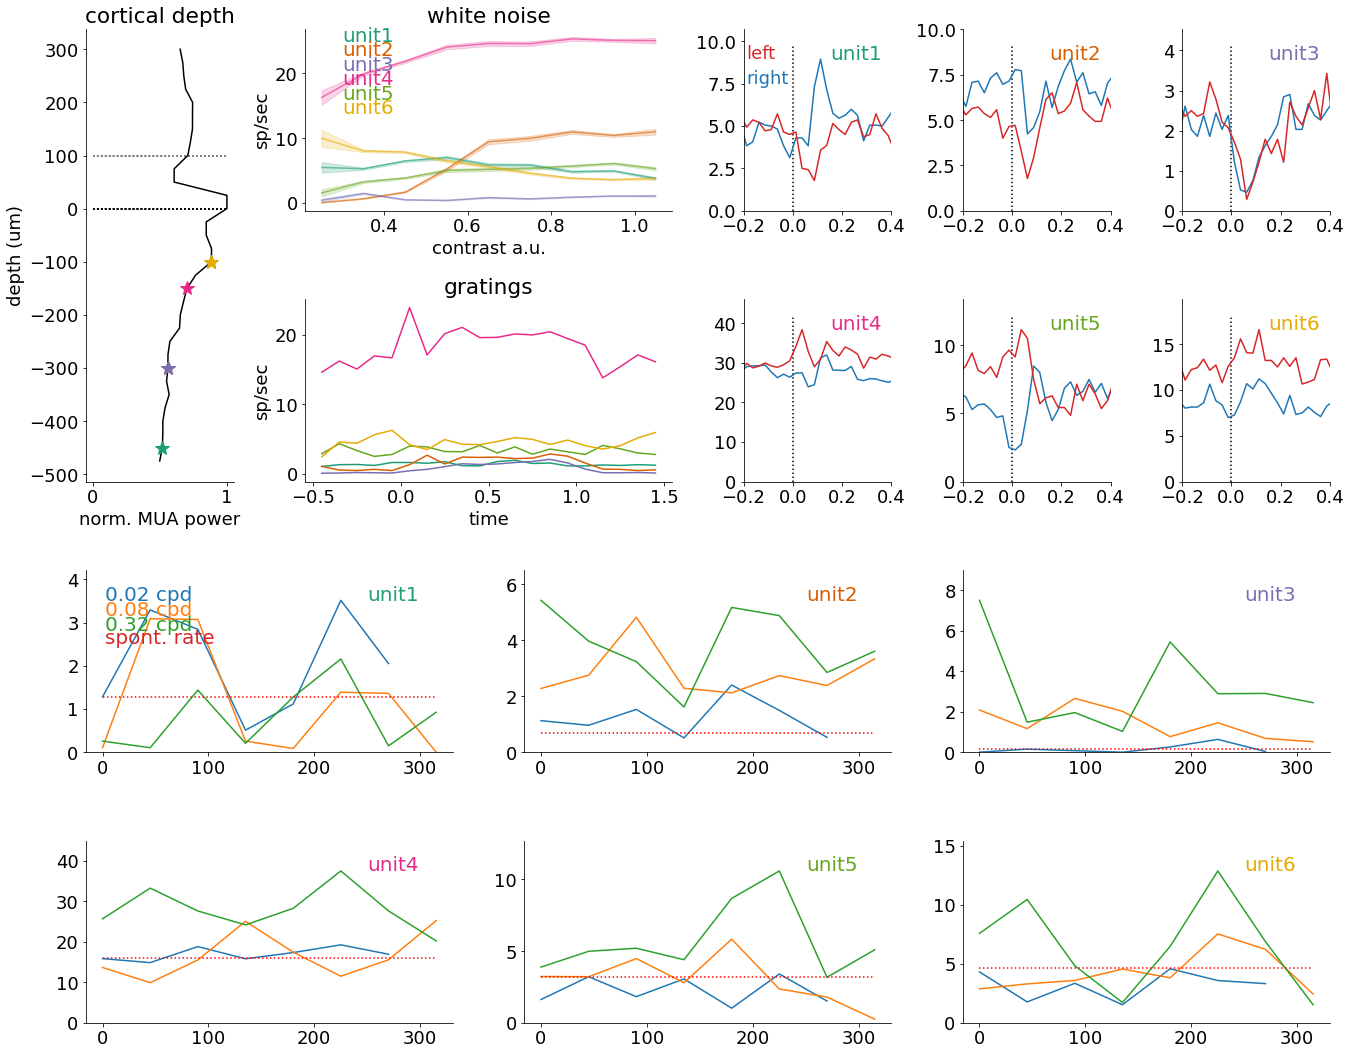

In [105]:
# fig 2: example visual tuning properties

units_to_highlight = [0,1,2,3,4,5]
unit_labels = ['unit1','unit2','unit3','unit4','unit5','unit6']
unit_cmap = cm.Dark2(np.arange(8))

fig2 = plt.figure(constrained_layout=True, figsize=(25,15))
spec2 = gridspec.GridSpec(ncols=8, nrows=4, figure=fig2)

ax_depth = fig2.add_subplot(spec2[0:2,0])
ax_contrast = fig2.add_subplot(spec2[0,1:3])
ax_grat_psth = fig2.add_subplot(spec2[1,1:3])
ax_sacc1 = fig2.add_subplot(spec2[0,3])
ax_sacc2 = fig2.add_subplot(spec2[0,4])
ax_sacc3 = fig2.add_subplot(spec2[0,5])
ax_sacc4 = fig2.add_subplot(spec2[1,3])
ax_sacc5 = fig2.add_subplot(spec2[1,4])
ax_sacc6 = fig2.add_subplot(spec2[1,5])
ax_ori1 = fig2.add_subplot(spec2[2,0:2])
ax_ori2 = fig2.add_subplot(spec2[2,2:4])
ax_ori3 = fig2.add_subplot(spec2[2,4:6])
ax_ori4 = fig2.add_subplot(spec2[3,0:2])
ax_ori5 = fig2.add_subplot(spec2[3,2:4])
ax_ori6 = fig2.add_subplot(spec2[3,4:6])

ch_shank = int(np.floor(pop.data['ch'].iloc[units_to_highlight[0]]/32))
power_profile = pop.data['hf1_wn_lfp_power_profiles'].iloc[units_to_highlight[0]][ch_shank]

ax_depth.plot(power_profile, 25*np.arange(32)-(pop.data['hf1_wn_lfp_layer5_centers'].iloc[units_to_highlight[0]][ch_shank]*25), 'k')

for count, row in pop.data.iloc[units_to_highlight].iterrows():
    ax_depth.plot(power_profile[int(row['ch']%32)], row['hf1_wn_depth_from_layer5'], '*', color=unit_cmap[count], markersize=15)
    ax_depth.hlines(100, 0, 1, linestyles='dotted', colors='gray')
    ax_depth.hlines(0, 0, 1, linestyles='dotted', colors='k')
ax_depth.set_ylabel('depth (um)')
ax_depth.set_xlabel('norm. MUA power')
ax_depth.set_title('cortical depth')

for count, row in pop.data.iloc[units_to_highlight].iterrows():
    ax_contrast.plot(row['hf1_wn_crf_cent'], row['hf1_wn_crf_tuning'], alpha=0.6, color=unit_cmap[count])
    ax_contrast.fill_between(row['hf1_wn_crf_cent'],
                             row['hf1_wn_crf_tuning']-row['hf1_wn_crf_err'],
                             row['hf1_wn_crf_tuning']+row['hf1_wn_crf_err'], alpha=0.2, color=unit_cmap[count])
    ax_contrast.annotate(unit_labels[count], xy=[0.3,25-(count*2.25)], color=unit_cmap[count], fontsize=20)
ax_contrast.set_ylabel('sp/sec')
ax_contrast.set_xlabel('contrast a.u.')
ax_contrast.set_title('white noise')

lower = -0.5; upper = 1.5; dt = 0.1
bins = np.arange(lower,upper+dt,dt)
for count, row in pop.data.iloc[units_to_highlight].iterrows():
    ax_grat_psth.plot(bins[0:-1]+dt/2, row['hf3_gratings_grating_psth'], color=unit_cmap[count])
ax_grat_psth.set_xlabel('time')
ax_grat_psth.set_ylabel('sp/sec')
ax_grat_psth.set_title('gratings')
    
for count, row in pop.data.iloc[units_to_highlight].iterrows():
    panel = [ax_sacc1,ax_sacc2,ax_sacc3,ax_sacc4,ax_sacc5,ax_sacc6][count]
    right = row['fm1_upsacc_avg_gaze_shift_dEye']
    left = row['fm1_downsacc_avg_gaze_shift_dEye']
    panel.plot(pop.trange_x, right, color='tab:blue')
    panel.plot(pop.trange_x, left, color='tab:red')
    maxval = np.max(np.maximum(right, left))
    panel.annotate(unit_labels[count], xy=[0.15,maxval], color=unit_cmap[count], fontsize=20)
    panel.set_ylim([0, maxval*1.2])
    panel.set_xlim([-0.2, 0.4])
    panel.set_xticks(np.arange(-0.2,0.4,0.2))
    panel.vlines(0,0,maxval*1.1,linestyles='dotted',colors='k')
    if count==0:
        panel.annotate('left', xy=[-0.19,9], color='tab:red')
        panel.annotate('right', xy=[-0.19,7.5], color='tab:blue')
        
for count, row in pop.data.iloc[units_to_highlight].iterrows():
    panel = [ax_ori1,ax_ori2,ax_ori3,ax_ori4,ax_ori5,ax_ori6][count]
    raw_tuning = np.mean(row['hf3_gratings_ori_tuning'],2)
    drift_spont = row['hf3_gratings_drift_spont']
    tuning = raw_tuning - drift_spont
    tuning[tuning < 0] = 0
    panel.plot(np.arange(8)*45, raw_tuning[:,0])
    panel.plot(np.arange(8)*45, raw_tuning[:,1])
    panel.plot(np.arange(8)*45, raw_tuning[:,2])
    panel.plot([0,315], [drift_spont,drift_spont], 'r:', label='spont. rate')
    maxval = np.nanmax(raw_tuning)
    panel.set_ylim([0, maxval*1.2])
    if count==0:
        panel.annotate('0.02 cpd', xy=[2,maxval], color='tab:blue', fontsize=20)
        panel.annotate('0.08 cpd', xy=[2,maxval-0.35], color='tab:orange', fontsize=20)
        panel.annotate('0.32 cpd', xy=[2,maxval-0.7], color='tab:green', fontsize=20)
        panel.annotate('spont. rate', xy=[2,maxval-1], color='tab:red', fontsize=20)
    panel.annotate(unit_labels[count], xy=[250, maxval], color=unit_cmap[count], fontsize=20)
    
fig2.tight_layout()

fig2.savefig('/home/niell_lab/Desktop/fig2.pdf')

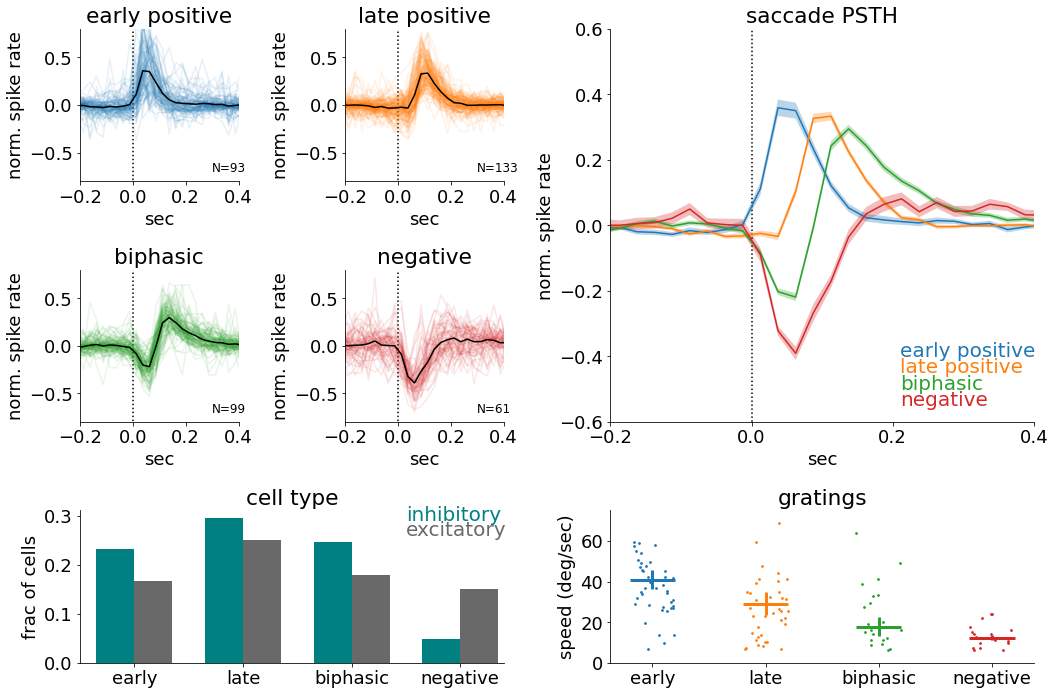

In [18]:
# fig 3: dEye clusters
unit = 511
this_session = pop.data[pop.data['session']=='070921_J553RT_control_Rig2']
this_unit = this_session[this_session['index']==unit]

fig3 = plt.figure(constrained_layout=True, figsize=(15,10))
spec3 = gridspec.GridSpec(ncols=4, nrows=3, figure=fig3)

ax_early = fig3.add_subplot(spec3[0,0])
ax_late = fig3.add_subplot(spec3[0,1])
ax_biphasic = fig3.add_subplot(spec3[1,0])
ax_negative = fig3.add_subplot(spec3[1,1])
ax_all_psth = fig3.add_subplot(spec3[0:2,2:5])
ax_celltype = fig3.add_subplot(spec3[2:,0:2])
ax_grat_speed = fig3.add_subplot(spec3[2:,2:5])

ax_early.set_title('early positive')
all_early = flatten_series(pop.data['norm_deflection_at_pref_direction'][pop.data['movement_psth_type_simple']=='early'])
for i in range(len(all_early)):
    ax_early.plot(pop.trange_x, all_early[i], color='tab:blue', alpha=0.1)
ax_early.set_ylabel('norm. spike rate')
ax_early.set_xlabel('sec')
ax_early.set_ylim([-0.8,0.8])
ax_early.set_xlim([-0.2,0.4])
# ax_early.axes.get_xaxis().set_visible(False)
ax_early.set_xticks(np.arange(-0.2,0.4,0.2))
ax_early.plot(pop.trange_x, np.nanmean(all_early,0), color='k')
ax_early.vlines(0,-1,1,linestyles='dotted',colors='k')
ax_early.annotate('N='+str(len(all_early)), xy=[0.3,-0.7], color='k', fontsize=12)

ax_late.set_title('late positive')
all_late = flatten_series(pop.data['norm_deflection_at_pref_direction'][pop.data['movement_psth_type_simple']=='late'])
for i in range(len(all_late)):
    ax_late.plot(pop.trange_x, all_late[i], color='tab:orange', alpha=0.1)
ax_late.set_ylabel('norm. spike rate')
ax_late.set_xlabel('sec')
ax_late.set_ylim([-0.8,0.8])
ax_late.set_xlim([-0.2,0.4])
# ax_late.axes.get_xaxis().set_visible(False)
# ax_late.axes.get_yaxis().set_visible(False)
ax_late.set_xticks(np.arange(-0.2,0.4,0.2))
ax_late.plot(pop.trange_x, np.nanmean(all_late, 0), color='k')
ax_late.vlines(0,-1,1,linestyles='dotted',colors='k')
ax_late.annotate('N='+str(len(all_late)), xy=[0.3,-0.7], color='k', fontsize=12)

ax_biphasic.set_title('biphasic')
all_biphasic = flatten_series(pop.data['norm_deflection_at_pref_direction'][pop.data['movement_psth_type_simple']=='biphasic'])
for i in range(len(all_biphasic)):
    ax_biphasic.plot(pop.trange_x, all_biphasic[i], color='tab:green', alpha=0.1)
ax_biphasic.set_ylabel('norm. spike rate')
ax_biphasic.set_xlabel('sec')
ax_biphasic.set_ylim([-0.8,0.8])
ax_biphasic.set_xlim([-0.2,0.4])
ax_biphasic.set_xticks(np.arange(-0.2,0.4,0.2))
ax_biphasic.plot(pop.trange_x, np.nanmean(all_biphasic,0), color='k')
ax_biphasic.vlines(0,-1,1,linestyles='dotted',colors='k')
ax_biphasic.annotate('N='+str(len(all_biphasic)), xy=[0.3,-0.7], color='k', fontsize=12)

ax_negative.set_title('negative')
all_negative = flatten_series(pop.data['norm_deflection_at_pref_direction'][pop.data['movement_psth_type_simple']=='negative'])
for i in range(len(all_negative)):
    ax_negative.plot(pop.trange_x, all_negative[i], color='tab:red', alpha=0.1)
ax_negative.set_ylabel('norm. spike rate')
ax_negative.plot(pop.trange_x, np.nanmean(all_negative,0), color='k')
ax_negative.set_xlabel('sec')
# ax_negative.axes.get_yaxis().set_visible(False)
ax_negative.set_ylim([-0.8,0.8])
ax_negative.set_xlim([-0.2,0.4])
ax_negative.set_xticks(np.arange(-0.2,0.4,0.2))
ax_negative.vlines(0,-1,1,linestyles='dotted',colors='k')
ax_negative.annotate('N='+str(len(all_negative)), xy=[0.3,-0.7], color='k', fontsize=12)

psth_labels = ['early','late','biphasic','negative']

for count, label in enumerate(psth_labels):
    cluster = flatten_series(pop.data['norm_deflection_at_pref_direction'][pop.data['movement_psth_type_simple']==label])
    cluster_mean = np.nanmean(cluster, 0)
    cluster_stderr = np.std(cluster,0) / np.sqrt(np.size(cluster,0))
    ax_all_psth.plot(pop.trange_x, cluster_mean)
    ax_all_psth.fill_between(pop.trange_x, cluster_mean-cluster_stderr, cluster_mean+cluster_stderr, alpha=0.3)
ax_all_psth.annotate('early positive', xy=[0.21,-0.4], color='tab:blue', fontsize=20)
ax_all_psth.annotate('late positive', xy=[0.21,-0.45], color='tab:orange', fontsize=20)
ax_all_psth.annotate('biphasic', xy=[0.21,-0.5], color='tab:green', fontsize=20)
ax_all_psth.annotate('negative', xy=[0.21,-0.55], color='tab:red', fontsize=20)
ax_all_psth.set_xlim([-0.2,0.4])
ax_all_psth.set_ylim([-0.6,0.6])
ax_all_psth.vlines(0,-1,1,linestyles='dotted',colors='k')
ax_all_psth.set_title('saccade PSTH')
ax_all_psth.set_xticks(np.arange(-0.2,0.4,0.2))
ax_all_psth.set_xlabel('sec')
ax_all_psth.set_ylabel('norm. spike rate')

key_data = np.zeros([len(psth_labels),2])
for count, label in enumerate(psth_labels):
    num_inh = len(pop.data[pop.data['movement_psth_type_simple']==label][pop.data['exc_or_inh']=='inh'])
    num_exc = len(pop.data[pop.data['movement_psth_type_simple']==label][pop.data['exc_or_inh']=='exc'])
    if num_inh > 0:
        key_data[count, 0] = num_inh / len(pop.data[pop.data['exc_or_inh']=='inh'])
    if num_exc > 0:
        key_data[count, 1] = num_exc / len(pop.data[pop.data['exc_or_inh']=='exc'])
width = 0.35
x = np.arange(len(psth_labels))
ax_celltype.bar(x-width/2, key_data[:,0], width=width, label='inhibitory', color='teal')
ax_celltype.bar(x+width/2, key_data[:,1], width=width, label='excitatory', color='dimgray')
ax_celltype.set_xticks(range(4))
ax_celltype.set_xlim([-0.5,3.4])
ax_celltype.set_xticklabels(psth_labels)
ax_celltype.set_ylabel('frac of cells')
ax_celltype.set_title('cell type')
ax_celltype.annotate('inhibitory', xy=[2.5,0.29], color='teal', fontsize=20)
ax_celltype.annotate('excitatory', xy=[2.5,0.26], color='dimgray', fontsize=20)

psth_colors = ['tab:blue','tab:orange','tab:green','tab:red']

for count, label in enumerate(psth_labels):
    grat_speed = pop.data['grat_speed_dps'][pop.data['movement_psth_type_simple']==label][pop.data['responsive_to_gratings']]
    mean = np.nanmedian(grat_speed,0)
    stderr = np.nanstd(grat_speed) / np.sqrt(np.size(grat_speed,0))
    lbound = count-0.2; ubound = count+0.2
    x_jitter = np.random.uniform(lbound, ubound, np.size(grat_speed,0))
    ax_grat_speed.scatter(x_jitter, grat_speed, s=3, color=psth_colors[count])
    ax_grat_speed.hlines(mean, lbound, ubound, linewidth=3, color=psth_colors[count])
    ax_grat_speed.vlines(count, mean-stderr, mean+stderr, linewidth=3, color=psth_colors[count])
ax_grat_speed.set_ylim([0,75])
ax_grat_speed.set_xticks(range(len(psth_labels)))
ax_grat_speed.set_xticklabels(psth_labels)
ax_grat_speed.set_title('gratings')
ax_grat_speed.set_ylabel('speed (deg/sec)')

fig3.tight_layout()